In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.cm as cm
import stat_plot as SP
import stattest as ST
import models as mdl

In [2]:
train_df = pd.read_csv("../../data/processed-data/train_data.csv")
test_df = pd.read_csv("../../data/processed-data/test_data.csv")

In [3]:
# Convert the 'datetime' column to just the date (removes the time)
train_df['date'] = pd.to_datetime(train_df['date']).dt.date
test_df['date'] = pd.to_datetime(test_df['date']).dt.date

In [4]:
# Separate exogenous variables from the target columns
exog_train = train_df[['CL1', 'NG1']]
exog_test = test_df[['CL1', 'NG1']]

# Remove exogenous variables from train_df and test_df to avoid duplication
train_df = train_df.drop(columns=['CL1', 'NG1'])
test_df = test_df.drop(columns=['CL1', 'NG1'])


In [5]:
#Initial Model
order = (2, 1, 2)  # (p, d, q)
seasonal_order = (1, 1, 0, 21)  # (P, D, Q, m), where m is the seasonal period

# Fit the SARIMAX model
model_initial = SARIMAX(train_df['CVX'], order=order, seasonal_order=seasonal_order)
fitted_model_initial = model_initial.fit(disp=False)

# Print the model summary
print(fitted_model_initial.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                 CVX   No. Observations:                 2837
Model:             SARIMAX(2, 1, 2)x(1, 1, [], 21)   Log Likelihood               -5724.522
Date:                             Sat, 09 Nov 2024   AIC                          11461.044
Time:                                     14:10:10   BIC                          11496.700
Sample:                                 11-26-2009   HQIC                         11473.911
                                      - 10-09-2020                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.6878      0.009   -184.059      0.000      -1.706      -1.670
ar.L2         -0.9691      

In [6]:
order = (2, 1, 0)  # (p, d, q)
seasonal_order = (2, 1, 0, 21)  # (P, D, Q, m), where m is the seasonal period

# Fit the SARIMAX model
model_opt = SARIMAX(train_df['CVX'], order=order, seasonal_order=seasonal_order)
fitted_model_opt = model_opt.fit(disp=False)

# Print the model summary
print(fitted_model_opt.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                CVX   No. Observations:                 2837
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 21)   Log Likelihood               -5560.194
Date:                            Sat, 09 Nov 2024   AIC                          11130.388
Time:                                    14:10:18   BIC                          11160.102
Sample:                                11-26-2009   HQIC                         11141.111
                                     - 10-09-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0358      0.013     -2.803      0.005      -0.061      -0.011
ar.L2          0.0667      0.011   

Ljung-Box Test Results:
    lb_stat  lb_pvalue
1  0.000708   0.978773
2  0.012085   0.993975
3  0.047878   0.997253
4  2.014311   0.733127
5  2.715694   0.743717


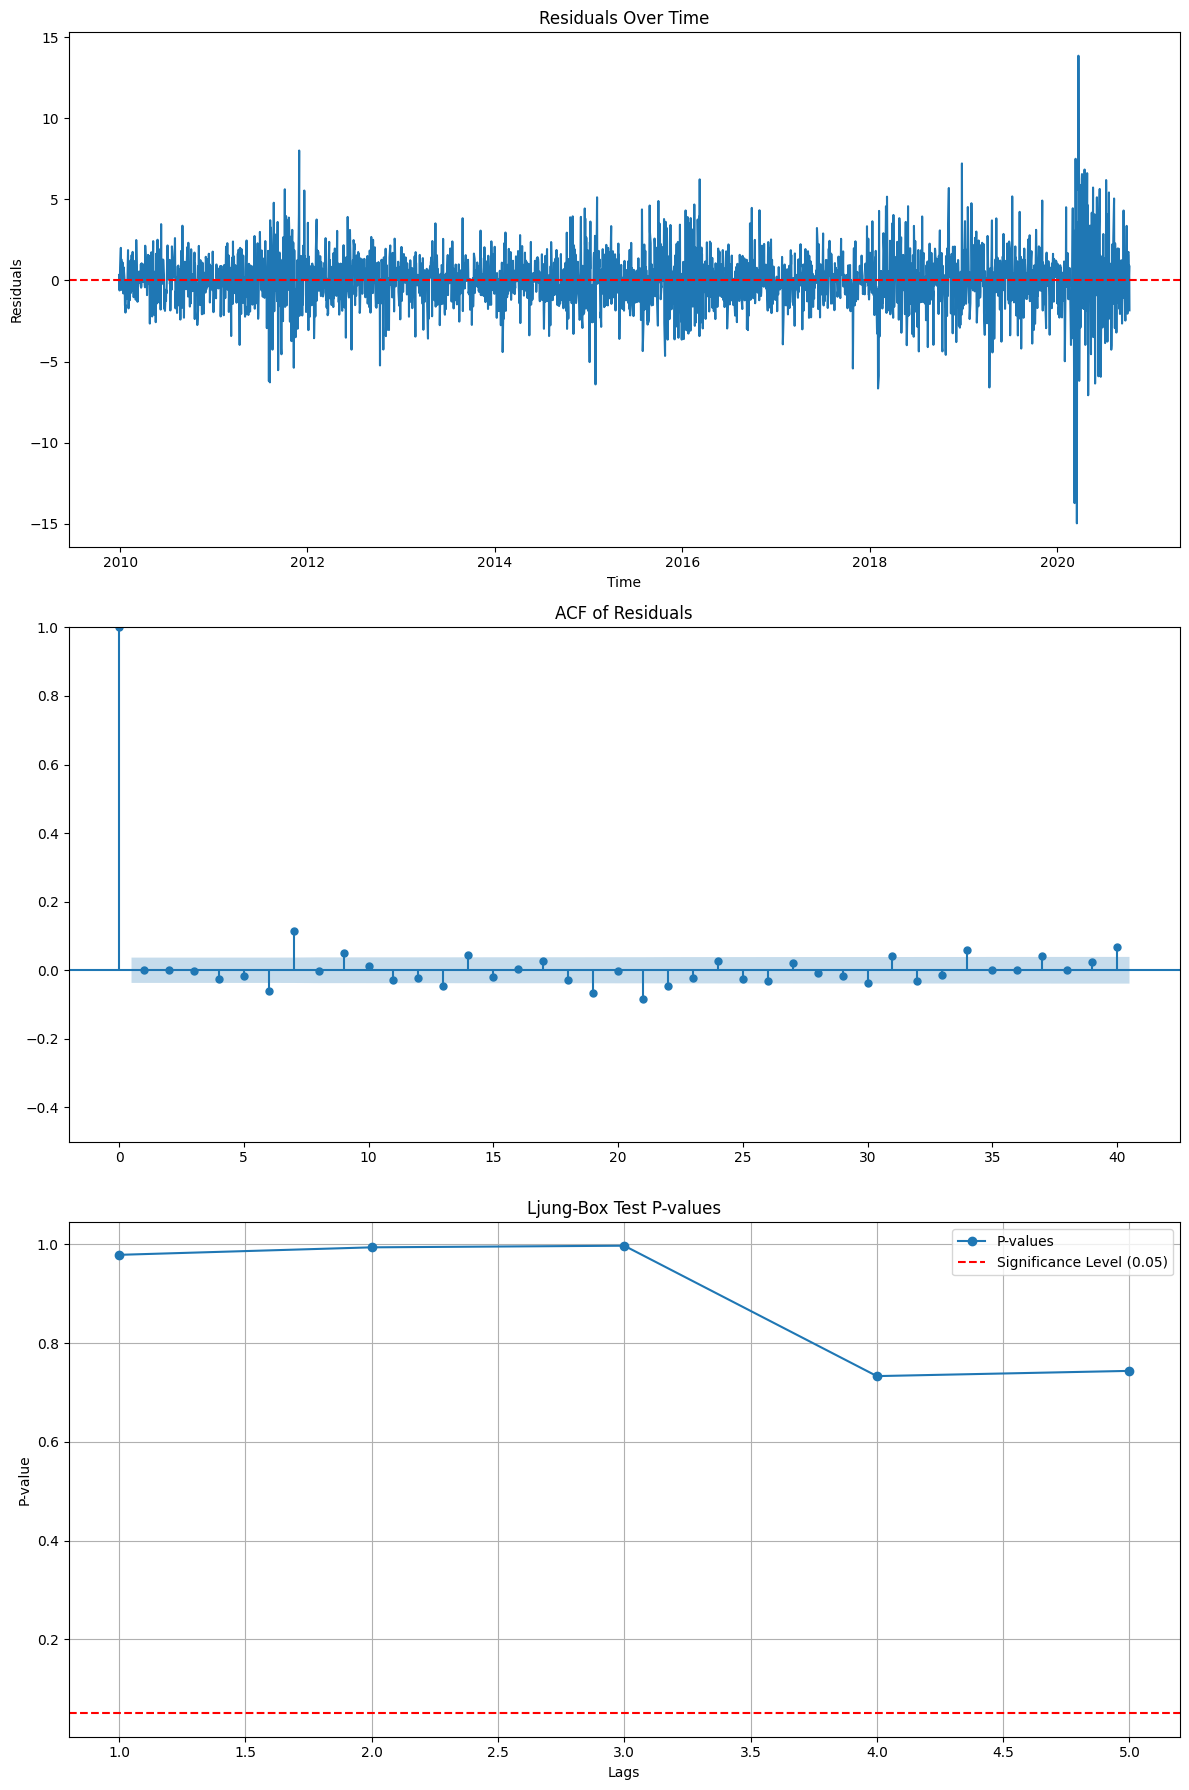

In [8]:
# Check residuals
residuals = fitted_model_opt.resid[22:] # Extract residuals

# Create a figure with subplots
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

# 1. Plot the residuals
axs[0].plot(residuals)
axs[0].set_title('Residuals Over Time')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Residuals')
axs[0].axhline(y=0, color='r', linestyle='--')

# 2. ACF plot of residuals
plot_acf(residuals, lags=40, ax=axs[1])
axs[1].set_title('ACF of Residuals')
axs[1].set_ylim(-0.5, 1)

# 3. Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[1,2,3,4,5], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test)

# Plot Ljung-Box test p-values
axs[2].plot(lb_test.index, lb_test['lb_pvalue'], marker='o', linestyle='-', label='P-values')
axs[2].axhline(y=0.05, color='r', linestyle='--', label='Significance Level (0.05)')
axs[2].set_title('Ljung-Box Test P-values')
axs[2].set_xlabel('Lags')
axs[2].set_ylabel('P-value')
axs[2].grid(True)
axs[2].legend()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

##Prediction

CVX - Mean Absolute Error: 2.0143091522869305


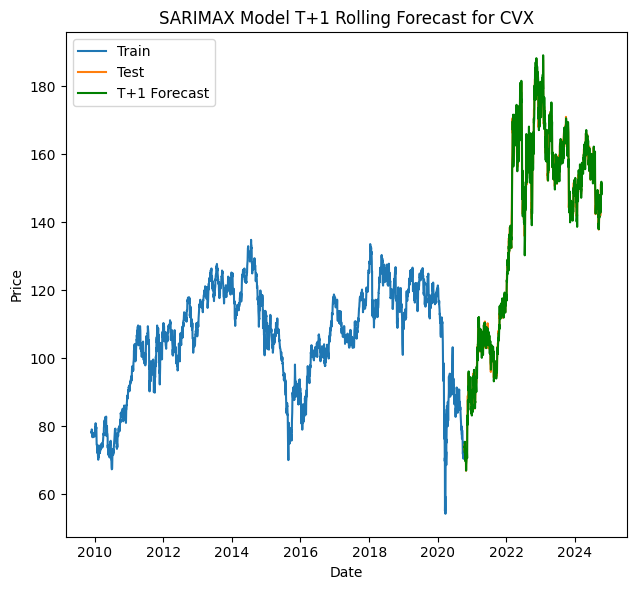

In [11]:

cvx_sarima_model, cvx_results_dict = mdl.run_sarima(train_df[['CVX']], test_df[['CVX']], order=(2,1,0), seasonal_order=(2,1,0,21))

In [12]:
import pickle
# Save models and result_dict to files
with open('cvx_sarima_210_21021_model.pkl', 'wb') as models_file:
    pickle.dump(cvx_sarima_model, models_file)

with open('cvx_sarima_210_21021_result_dict.pkl', 'wb') as result_file:
    pickle.dump(cvx_results_dict, result_file)

print("Models and results have been saved.")

Models and results have been saved.


In [4]:
# Load the SARIMA model
with open('cvx_sarima_210_10121_model.pkl', 'rb') as models_file:
    cvx_sarima_model = pickle.load(models_file)

# Load the result dictionary
with open('cvx_sarima_210_10121_result_dict.pkl', 'rb') as result_file:
    cvx_results_dict = pickle.load(result_file)

print("Model and results have been loaded.")

Model and results have been loaded.
